In [49]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [3]:
os.chdir("/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS")

In [9]:
sample_ls = [
    'Npm2a-256-2N_20221209', 'Npm2a-256-2N_20221216',
    'Npm2a-256-4N_20221209', 'Npm2a-256-4N_20221216',
    
    'Npm2a-1k-2N_20221209', 'Npm2a-1k-2N_20221216',
    'Npm2a-1k-4N_20221209', 'Npm2a-1k-4N_20221216',
    
    'Npm2a-4-5h-2N_20221209', 'Npm2a-4-5h-1-2N_20221216', 'Npm2a-4-5h-2-2N_20221216',
    'Npm2a-4-5h-4N_20221209', 'Npm2a-4-5h-1-4N_20221216', 'Npm2a-4-5h-2-4N_20221216',
    
    'Npm2a-5-5h-1-2N_20221209', 'Npm2a-5-5h-2-2N_20221209',
    'Npm2a-5-5h-1-4N_20221209', 'Npm2a-5-5h-2-4N_20221209',
            ]

In [16]:
chrom_sizes = pd.read_csv('/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/chromSizes/danRer11_2_main.chrom.sizes', 
                          sep = "\t", 
                          header = None, 
                          names = ['chr', 'length'])

In [ ]:
chrom_cov_dict = {}

In [108]:
# for sample in ['Npm2a-256-2N_20221209'] :
# for sample in sample_ls :
# for sample in sample_ls[:-4] :
for sample in sample_ls[-4:] :
    bdg = pd.read_csv(f'/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/2_signal/{sample}.bedGraph', header = None, sep = "\t", names = ['chr', 'start', 'end', 'depth'])
    bdg['cov_total'] = bdg['depth'] * (bdg['end'] - bdg['start'])
    chrom_cov = bdg[['chr', 'cov_total']].groupby(['chr']).sum()
    chrom_cov = pd.merge(chrom_cov, chrom_sizes, on = 'chr')
    chrom_cov['cov_mean'] = chrom_cov['cov_total'] / chrom_cov['length']
    chrom_cov_dict[sample] = chrom_cov
        
    
chrom_cov_dict[sample]

,chr,cov_total,length,cov_mean
0,chr1,237196599,59578282,3.981259
1,chr10,42011289,45420867,0.924934
2,chr11,206670773,45484837,4.543729
3,chr12,84191948,49182954,1.711812
4,chr13,143526690,52186027,2.750290
5,chr14,36324003,52660232,0.689781
6,chr15,752406830,48040578,15.661902
7,chr16,241702676,55266484,4.373404
8,chr17,369916220,53461100,6.919353
9,chr18,70677924,51023478,1.385204


In [128]:
chrom_cov_df = chrom_cov_dict[sample_ls[0]][['chr', 'cov_mean']]
chrom_cov_df.columns = ['chr', sample_ls[0]]
# for sample in sample_ls[1:] :
for sample in sample_ls[1:] :
    chrom_cov_df = pd.merge(chrom_cov_df, chrom_cov_dict[sample][['chr', 'cov_mean']], on = 'chr')
    chrom_cov_df.columns = chrom_cov_df.columns[:-1].tolist() + [sample]
    
chrom_cov_df

,chr,Npm2a-256-2N_20221209,Npm2a-256-2N_20221216,Npm2a-256-4N_20221209,Npm2a-256-4N_20221216,Npm2a-1k-2N_20221209,Npm2a-1k-2N_20221216,Npm2a-1k-4N_20221209,Npm2a-1k-4N_20221216,Npm2a-4-5h-2N_20221209,Npm2a-4-5h-1-2N_20221216,Npm2a-4-5h-2-2N_20221216,Npm2a-4-5h-4N_20221209,Npm2a-4-5h-1-4N_20221216,Npm2a-4-5h-2-4N_20221216,Npm2a-5-5h-1-2N_20221209,Npm2a-5-5h-2-2N_20221209,Npm2a-5-5h-1-4N_20221209,Npm2a-5-5h-2-4N_20221209
0,chr1,0.749836,4.190740,2.666256,4.527694,3.144649,4.685928,1.503543,6.791059,3.717229,13.530027,4.582447,3.907547,5.106787,8.266565,1.712717,1.988314,0.231437,3.981259
1,chr10,0.856436,2.970239,3.794654,5.028909,2.395354,5.052880,1.873950,7.572218,2.279211,9.968315,7.698643,4.613558,7.534450,8.881613,0.608087,1.836764,0.322992,0.924934
2,chr11,5.015363,1.725033,4.116908,5.043406,6.268338,7.512841,3.358382,7.083361,1.251275,3.339789,9.489509,3.220896,7.207501,10.177898,1.684562,8.885033,0.579014,4.543729
3,chr12,1.537943,2.337055,5.801483,4.955734,6.064220,4.293210,2.563869,6.928712,2.543172,3.625941,5.529201,3.606051,7.461828,9.232347,1.369696,4.458118,6.948721,1.711812
4,chr13,9.698868,4.542077,2.656060,4.981920,2.542587,4.748472,2.701194,6.188469,4.668947,5.720022,3.237315,3.452493,6.476273,7.871521,1.725010,3.315798,0.256532,2.750290
5,chr14,0.669484,3.090052,3.038822,4.305188,2.974263,8.848700,2.813438,5.168270,2.926419,2.680864,5.533710,2.831817,4.577368,7.976784,0.889799,0.970826,0.349330,0.689781
6,chr15,0.905625,2.461832,5.044385,4.223475,2.427763,5.198508,3.542839,6.293240,0.979216,1.559404,3.151304,2.910921,3.778662,5.464369,2.023992,0.642839,0.864011,15.661902
7,chr16,1.063885,3.019056,3.349778,4.287989,2.994824,12.662462,2.773843,5.390195,2.531129,2.918080,5.173111,3.699095,6.628110,7.942374,1.054632,1.607256,0.531932,4.373404
8,chr17,3.306024,3.373606,5.636214,4.203310,2.624821,4.664431,2.421514,5.203449,1.988760,2.787120,9.099467,3.855108,6.091997,7.899908,2.781361,1.846473,0.456754,6.919353
9,chr18,1.194596,11.724995,4.289995,4.538718,4.850724,5.153968,2.579010,6.291440,2.055444,2.846343,5.461130,2.987786,5.199911,7.674611,2.858590,1.617343,0.226750,1.385204


In [129]:
chrom_cov_df_ordered = chrom_cov_df.drop(25)
chrom_cov_df_ordered['order'] = chrom_cov_df_ordered['chr'].str.split('r', expand = True)[1].astype(int)
chrom_cov_df_ordered = chrom_cov_df_ordered.sort_values(['order'])
chrom_cov_df_ordered

,chr,Npm2a-256-2N_20221209,Npm2a-256-2N_20221216,Npm2a-256-4N_20221209,Npm2a-256-4N_20221216,Npm2a-1k-2N_20221209,Npm2a-1k-2N_20221216,Npm2a-1k-4N_20221209,Npm2a-1k-4N_20221216,Npm2a-4-5h-2N_20221209,Npm2a-4-5h-1-2N_20221216,Npm2a-4-5h-2-2N_20221216,Npm2a-4-5h-4N_20221209,Npm2a-4-5h-1-4N_20221216,Npm2a-4-5h-2-4N_20221216,Npm2a-5-5h-1-2N_20221209,Npm2a-5-5h-2-2N_20221209,Npm2a-5-5h-1-4N_20221209,Npm2a-5-5h-2-4N_20221209,order
0,chr1,0.749836,4.190740,2.666256,4.527694,3.144649,4.685928,1.503543,6.791059,3.717229,13.530027,4.582447,3.907547,5.106787,8.266565,1.712717,1.988314,0.231437,3.981259,1
11,chr2,1.980795,2.524511,3.492882,3.768189,2.087042,3.374237,3.348744,5.252383,1.436235,9.450640,9.091601,4.201849,4.487088,6.557911,1.857604,1.678142,4.711975,0.674337,2
18,chr3,0.743739,3.913059,3.204181,3.525451,1.704004,6.379780,3.759817,5.627829,2.181851,1.732379,3.075943,3.569627,6.114996,6.958686,0.886583,0.616613,0.191077,0.557913,3
19,chr4,1.444288,2.567058,2.152563,3.215391,1.778472,2.059584,2.893914,4.339549,2.085401,1.540072,3.575133,4.005663,3.950794,5.198176,0.671380,1.229770,0.168188,0.519440,4
20,chr5,1.060271,3.072184,3.239715,3.455654,1.603919,3.612686,3.291720,6.321596,1.641690,6.813864,4.607692,4.320336,5.331379,6.387133,0.905222,0.808600,3.626669,0.441043,5
21,chr6,9.583347,5.209481,3.281494,4.281154,2.687366,5.039863,2.492056,5.616105,2.223622,2.467340,6.176694,3.842872,5.489647,7.546315,1.960498,2.926037,9.531253,1.023688,6
22,chr7,1.489254,3.391768,1.849471,3.626605,1.543095,2.618037,3.573991,5.628492,2.104006,1.901752,3.916101,4.757275,5.974855,7.386826,0.632060,1.250282,3.910687,1.590047,7
23,chr8,4.866050,2.125659,3.768425,4.630533,2.829331,3.524615,2.841481,5.180673,2.003872,2.565359,2.729755,3.637228,5.117466,6.908221,2.918136,1.751570,1.385758,0.665414,8
24,chr9,0.908379,8.015368,2.098137,4.432625,1.848934,3.007840,2.854926,5.294542,2.227932,3.238164,5.134540,4.178497,6.310695,7.935956,1.656842,1.526692,0.268341,1.749431,9
1,chr10,0.856436,2.970239,3.794654,5.028909,2.395354,5.052880,1.873950,7.572218,2.279211,9.968315,7.698643,4.613558,7.534450,8.881613,0.608087,1.836764,0.322992,0.924934,10


In [72]:
stage_dict = {
    '256': '256-cell',
    '1k': '1k-cell',
    '4': '4.5hpf',
    '5': '5.5hpf'
}

In [130]:
chrom_cov_df_melt = chrom_cov_df_ordered.drop('chr', axis = 1).melt(id_vars = 'order')
chrom_cov_df_melt['stage'] = chrom_cov_df_melt['variable'].str.split('-', expand = True)[1]
chrom_cov_df_melt['stage'] = [stage_dict[x] for x in chrom_cov_df_melt['stage']]
chrom_cov_df_melt['nuclear'] = [x[-2:] for x in chrom_cov_df_melt['variable'].str.split('_', expand = True)[0]]
chrom_cov_df_melt['stage-nuclear'] = chrom_cov_df_melt['stage'] + ' ' + chrom_cov_df_melt['nuclear']
chrom_cov_df_melt

,order,variable,value,stage,nuclear,stage-nuclear
0,1,Npm2a-256-2N_20221209,0.749836,256-cell,2N,256-cell 2N
1,2,Npm2a-256-2N_20221209,1.980795,256-cell,2N,256-cell 2N
2,3,Npm2a-256-2N_20221209,0.743739,256-cell,2N,256-cell 2N
3,4,Npm2a-256-2N_20221209,1.444288,256-cell,2N,256-cell 2N
4,5,Npm2a-256-2N_20221209,1.060271,256-cell,2N,256-cell 2N
...,...,...,...,...,...,...
445,21,Npm2a-5-5h-2-4N_20221209,2.054155,5.5hpf,4N,5.5hpf 4N
446,22,Npm2a-5-5h-2-4N_20221209,1.424507,5.5hpf,4N,5.5hpf 4N
447,23,Npm2a-5-5h-2-4N_20221209,2.462666,5.5hpf,4N,5.5hpf 4N
448,24,Npm2a-5-5h-2-4N_20221209,1.639169,5.5hpf,4N,5.5hpf 4N


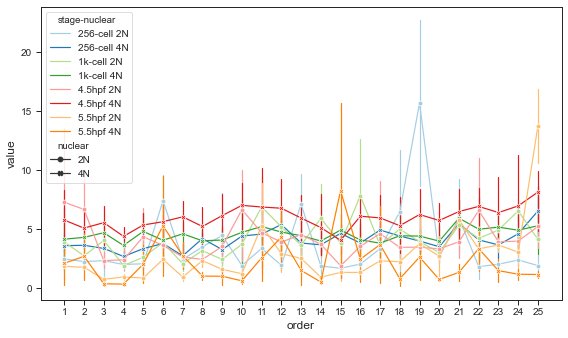

In [131]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, ax = plt.subplots(figsize = (6.4 * 1.25, 4.8), tight_layout = True)
    sns.lineplot(
        data = chrom_cov_df_melt,
        x = 'order',
        y = 'value',
        hue = 'stage-nuclear',
        style = 'nuclear',
        palette = 'Paired',
        ax = ax,
        markers=True, dashes=False,
        err_style="bars"
    )
    ax.set_xticks(range(1,26))
    

In [134]:
stage_order = {
    '256-cell' : 0,
    '1k-cell' : 1,
    '4.5hpf' : 2,
    '5.5hpf' : 3
}

chr,chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,...,chr21,chr22,chr23,chr24,chr25,names,4N / 2N,stage,stage-nuclear,stage_order
Npm2a-256-2N_20221209,0.749836,1.980795,0.743739,1.444288,1.060271,9.583347,1.489254,4.866050,0.908379,0.856436,...,9.256176,0.792425,1.217661,2.214303,0.966570,Npm2a-256-2N_20221209,2N,256-cell,256-cell 2N,0
Npm2a-256-2N_20221216,4.190740,2.524511,3.913059,2.567058,3.072184,5.209481,3.391768,2.125659,8.015368,2.970239,...,2.661589,2.852243,2.837533,2.553128,2.867109,Npm2a-256-2N_20221216,2N,256-cell,256-cell 2N,0
Npm2a-1k-2N_20221209,3.144649,2.087042,1.704004,1.778472,1.603919,2.687366,1.543095,2.829331,1.848934,2.395354,...,3.240016,3.997170,4.803179,7.391657,4.930916,Npm2a-1k-2N_20221209,2N,1k-cell,1k-cell 2N,1
Npm2a-1k-2N_20221216,4.685928,3.374237,6.379780,2.059584,3.612686,5.039863,2.618037,3.524615,3.007840,5.052880,...,7.435609,4.423632,5.037012,5.687634,3.343313,Npm2a-1k-2N_20221216,2N,1k-cell,1k-cell 2N,1
Npm2a-4-5h-2N_20221209,3.717229,1.436235,2.181851,2.085401,1.641690,2.223622,2.104006,2.003872,2.227932,2.279211,...,2.523068,4.289816,4.305853,1.836578,3.361559,Npm2a-4-5h-2N_20221209,2N,4.5hpf,4.5hpf 2N,2
Npm2a-4-5h-1-2N_20221216,13.530027,9.450640,1.732379,1.540072,6.813864,2.467340,1.901752,2.565359,3.238164,9.968315,...,4.034443,10.996867,4.049766,4.071383,3.726407,Npm2a-4-5h-1-2N_20221216,2N,4.5hpf,4.5hpf 2N,2
Npm2a-4-5h-2-2N_20221216,4.582447,9.091601,3.075943,3.575133,4.607692,6.176694,3.916101,2.729755,5.134540,7.698643,...,5.237121,4.471127,3.417194,6.041766,8.589929,Npm2a-4-5h-2-2N_20221216,2N,4.5hpf,4.5hpf 2N,2
Npm2a-5-5h-1-2N_20221209,1.712717,1.857604,0.886583,0.671380,0.905222,1.960498,0.632060,2.918136,1.656842,0.608087,...,5.613958,2.100168,4.286986,1.243845,10.635420,Npm2a-5-5h-1-2N_20221209,2N,5.5hpf,5.5hpf 2N,3
Npm2a-5-5h-2-2N_20221209,1.988314,1.678142,0.616613,1.229770,0.808600,2.926037,1.250282,1.751570,1.526692,1.836764,...,5.927831,4.551099,3.024687,4.853562,16.827268,Npm2a-5-5h-2-2N_20221209,2N,5.5hpf,5.5hpf 2N,3
Npm2a-256-4N_20221209,2.666256,3.492882,3.204181,2.152563,3.239715,3.281494,1.849471,3.768425,2.098137,3.794654,...,6.101424,4.018944,2.561649,4.167737,8.677009,Npm2a-256-4N_20221209,4N,256-cell,256-cell 4N,0


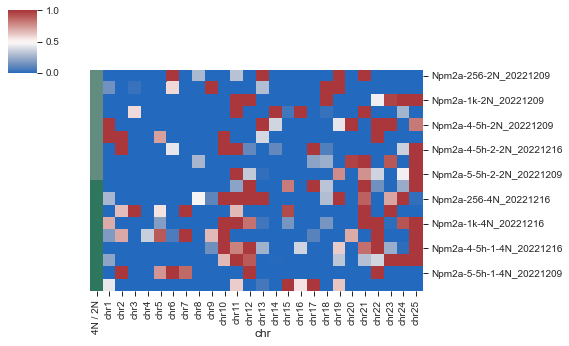

In [136]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    plot_df = chrom_cov_df_ordered.T.drop(['order', 'chr']).astype(float)
    plot_df.columns = chrom_cov_df_ordered['chr']
    plot_df['names'] = plot_df.index
    plot_df['4N / 2N'] = [x[-2:] for x in plot_df['names'].str.split('_', expand = True)[0]]
    plot_df['stage'] = plot_df['names'].str.split('-', expand = True)[1]
    plot_df['stage'] = [stage_dict[x] for x in plot_df['stage']]
    plot_df['stage-nuclear'] = plot_df['stage'] + ' ' + plot_df['4N / 2N']
    plot_df['stage_order'] = [stage_order[x] for x in plot_df['stage']]
    plot_df = plot_df.sort_values(['4N / 2N', 'stage_order'])

    
    lut = dict(zip(plot_df['4N / 2N'].unique(), ['#638C80', '#2E765E']))
    row_colors = plot_df['4N / 2N'].map(lut)
    
    c = sns.clustermap(
        plot_df.iloc[:, 0:-5],
        col_cluster = False,
        row_cluster = False,
        cmap="vlag",
        vmin = 0,
        vmax = 1,
        figsize = (6.4 * 1.25, 4.8 * 1),
        z_score = 0,
        row_colors = row_colors
    )

plot_df

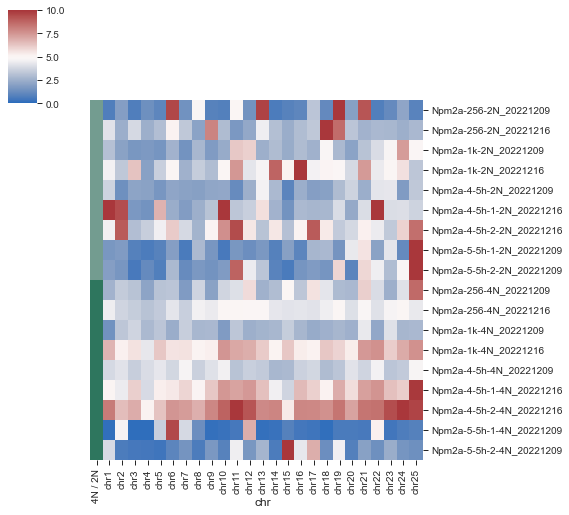

In [140]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    plot_df = chrom_cov_df_ordered.T.drop(['order', 'chr']).astype(float)
    plot_df.columns = chrom_cov_df_ordered['chr']
    plot_df['names'] = plot_df.index
    plot_df['4N / 2N'] = [x[-2:] for x in plot_df['names'].str.split('_', expand = True)[0]]
    plot_df['stage'] = plot_df['names'].str.split('-', expand = True)[1]
    plot_df['stage'] = [stage_dict[x] for x in plot_df['stage']]
    plot_df['stage-nuclear'] = plot_df['stage'] + ' ' + plot_df['4N / 2N']
    plot_df['stage_order'] = [stage_order[x] for x in plot_df['stage']]
    plot_df = plot_df.sort_values(['4N / 2N', 'stage_order'])

    
    lut = dict(zip(plot_df['4N / 2N'].unique(), ['#739C90', '#2E765E']))
    row_colors = plot_df['4N / 2N'].map(lut)
    
    c = sns.clustermap(
        plot_df.iloc[:, 0:-5],
        col_cluster = False,
        row_cluster = False,
        cmap="vlag",
#         cmap="Reds",
        vmin = 0,
        vmax = 10,
        figsize = (6.4 * 1.25, 4.8 * 1.5),
#         z_score = 0,
        row_colors = row_colors
    )

    c.savefig('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/figures/make1_heastmap_chrom_coverage.pdf', transparent = True)


In [141]:
plot_df

chr,chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,...,chr21,chr22,chr23,chr24,chr25,names,4N / 2N,stage,stage-nuclear,stage_order
Npm2a-256-2N_20221209,0.749836,1.980795,0.743739,1.444288,1.060271,9.583347,1.489254,4.866050,0.908379,0.856436,...,9.256176,0.792425,1.217661,2.214303,0.966570,Npm2a-256-2N_20221209,2N,256-cell,256-cell 2N,0
Npm2a-256-2N_20221216,4.190740,2.524511,3.913059,2.567058,3.072184,5.209481,3.391768,2.125659,8.015368,2.970239,...,2.661589,2.852243,2.837533,2.553128,2.867109,Npm2a-256-2N_20221216,2N,256-cell,256-cell 2N,0
Npm2a-1k-2N_20221209,3.144649,2.087042,1.704004,1.778472,1.603919,2.687366,1.543095,2.829331,1.848934,2.395354,...,3.240016,3.997170,4.803179,7.391657,4.930916,Npm2a-1k-2N_20221209,2N,1k-cell,1k-cell 2N,1
Npm2a-1k-2N_20221216,4.685928,3.374237,6.379780,2.059584,3.612686,5.039863,2.618037,3.524615,3.007840,5.052880,...,7.435609,4.423632,5.037012,5.687634,3.343313,Npm2a-1k-2N_20221216,2N,1k-cell,1k-cell 2N,1
Npm2a-4-5h-2N_20221209,3.717229,1.436235,2.181851,2.085401,1.641690,2.223622,2.104006,2.003872,2.227932,2.279211,...,2.523068,4.289816,4.305853,1.836578,3.361559,Npm2a-4-5h-2N_20221209,2N,4.5hpf,4.5hpf 2N,2
Npm2a-4-5h-1-2N_20221216,13.530027,9.450640,1.732379,1.540072,6.813864,2.467340,1.901752,2.565359,3.238164,9.968315,...,4.034443,10.996867,4.049766,4.071383,3.726407,Npm2a-4-5h-1-2N_20221216,2N,4.5hpf,4.5hpf 2N,2
Npm2a-4-5h-2-2N_20221216,4.582447,9.091601,3.075943,3.575133,4.607692,6.176694,3.916101,2.729755,5.134540,7.698643,...,5.237121,4.471127,3.417194,6.041766,8.589929,Npm2a-4-5h-2-2N_20221216,2N,4.5hpf,4.5hpf 2N,2
Npm2a-5-5h-1-2N_20221209,1.712717,1.857604,0.886583,0.671380,0.905222,1.960498,0.632060,2.918136,1.656842,0.608087,...,5.613958,2.100168,4.286986,1.243845,10.635420,Npm2a-5-5h-1-2N_20221209,2N,5.5hpf,5.5hpf 2N,3
Npm2a-5-5h-2-2N_20221209,1.988314,1.678142,0.616613,1.229770,0.808600,2.926037,1.250282,1.751570,1.526692,1.836764,...,5.927831,4.551099,3.024687,4.853562,16.827268,Npm2a-5-5h-2-2N_20221209,2N,5.5hpf,5.5hpf 2N,3
Npm2a-256-4N_20221209,2.666256,3.492882,3.204181,2.152563,3.239715,3.281494,1.849471,3.768425,2.098137,3.794654,...,6.101424,4.018944,2.561649,4.167737,8.677009,Npm2a-256-4N_20221209,4N,256-cell,256-cell 4N,0


In [142]:
fold_cov_df = plot_df.groupby(['stage-nuclear']).mean().reset_index()
fold_cov_df['nuclear'] = fold_cov_df['stage-nuclear'].str.split(' ', expand = True)[1]
fold_cov_df['stage'] = fold_cov_df['stage-nuclear'].str.split(' ', expand = True)[0]
fold_cov_df_2N = fold_cov_df[fold_cov_df['nuclear'].eq('2N')].reset_index()
fold_cov_df_4N = fold_cov_df[fold_cov_df['nuclear'].eq('4N')].reset_index()

In [143]:
fold_cov_df_2N

chr,index,stage-nuclear,chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,...,chr19,chr20,chr21,chr22,chr23,chr24,chr25,stage_order,nuclear,stage
0,0,1k-cell 2N,3.915288,2.730639,4.041892,1.919028,2.608303,3.863615,2.080566,3.176973,...,3.928661,3.023741,5.337813,4.210401,4.920096,6.539646,4.137115,1.0,2N,1k-cell
1,2,256-cell 2N,2.470288,2.252653,2.328399,2.005673,2.066228,7.396414,2.440511,3.495854,...,15.676744,2.659774,5.958883,1.822334,2.027597,2.383716,1.916839,0.0,2N,256-cell
2,4,4.5hpf 2N,7.276568,6.659492,2.330058,2.400202,4.354415,3.622552,2.640619,2.432995,...,3.473936,3.323239,3.931544,6.585937,3.924271,3.983242,5.225965,2.0,2N,4.5hpf
3,6,5.5hpf 2N,1.850515,1.767873,0.751598,0.950575,0.856911,2.443267,0.941171,2.334853,...,3.767658,2.705134,5.770894,3.325633,3.655837,3.048703,13.731344,3.0,2N,5.5hpf


In [144]:
fold_cov_df_4N

chr,index,stage-nuclear,chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,...,chr19,chr20,chr21,chr22,chr23,chr24,chr25,stage_order,nuclear,stage
0,1,1k-cell 4N,4.147301,4.300564,4.693823,3.616731,4.806658,4.054081,4.601242,4.011077,...,4.409525,3.981498,5.924434,4.989816,5.164244,4.905337,5.284449,1.0,4N,1k-cell
1,3,256-cell 4N,3.596975,3.630536,3.364816,2.683977,3.347685,3.781324,2.738038,4.199479,...,3.991476,3.507958,5.478742,4.087120,3.661805,4.599393,6.531865,0.0,4N,256-cell
2,5,4.5hpf 4N,5.760300,5.082283,5.547769,4.384878,5.346282,5.626278,6.039652,5.220972,...,6.230769,5.731459,6.487149,6.917868,6.399800,6.959752,8.133877,2.0,4N,4.5hpf
3,7,5.5hpf 4N,2.106348,2.693156,0.374495,0.343814,2.033856,5.277471,2.750367,1.025586,...,2.630106,0.739473,1.338843,3.346825,1.483133,1.183896,1.157010,3.0,4N,5.5hpf


In [147]:
fold_cov_4Nvs2N = fold_cov_df_4N.iloc[:,2:-3] / fold_cov_df_2N.iloc[:,2:-3]
fold_cov_4Nvs2N['stage_order'] = fold_cov_df_4N['stage_order']
fold_cov_4Nvs2N['stage'] = fold_cov_df_4N['stage']
fold_cov_4Nvs2N

chr,chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,...,chr18,chr19,chr20,chr21,chr22,chr23,chr24,chr25,stage_order,stage
0,1.059258,1.574929,1.161293,1.884668,1.842830,1.049297,2.211534,1.262547,1.677959,1.268243,...,0.886629,1.122399,1.316746,1.109899,1.185117,1.049623,0.750092,1.277327,1.0,1k-cell
1,1.456095,1.611671,1.445120,1.338193,1.620192,0.511237,1.121912,1.201274,0.731841,2.305804,...,0.683359,0.254611,1.318893,0.919424,2.242794,1.805983,1.929506,3.407623,0.0,256-cell
2,0.791623,0.763164,2.380958,1.826879,1.227784,1.553125,2.287210,2.145903,1.738117,1.054319,...,1.530680,1.793576,1.724660,1.650026,1.050400,1.630825,1.747258,1.556435,2.0,4.5hpf
3,1.138250,1.523388,0.498265,0.361690,2.373474,2.160005,2.922280,0.439251,0.633815,0.510430,...,0.360138,0.698075,0.273359,0.231999,1.006372,0.405689,0.388328,0.084260,3.0,5.5hpf


In [156]:
fold_cov_4Nvs2N_melt = fold_cov_4Nvs2N.melt(id_vars = ['stage_order', 'stage'])
fold_cov_4Nvs2N_melt['chr_order'] = fold_cov_4Nvs2N_melt['chr'].str.split('r', expand = True)[1].astype(int)
fold_cov_4Nvs2N_melt

,stage_order,stage,chr,value,chr_order
0,1.0,1k-cell,chr1,1.059258,1
1,0.0,256-cell,chr1,1.456095,1
2,2.0,4.5hpf,chr1,0.791623,1
3,3.0,5.5hpf,chr1,1.138250,1
4,1.0,1k-cell,chr2,1.574929,2
...,...,...,...,...,...
95,3.0,5.5hpf,chr24,0.388328,24
96,1.0,1k-cell,chr25,1.277327,25
97,0.0,256-cell,chr25,3.407623,25
98,2.0,4.5hpf,chr25,1.556435,25


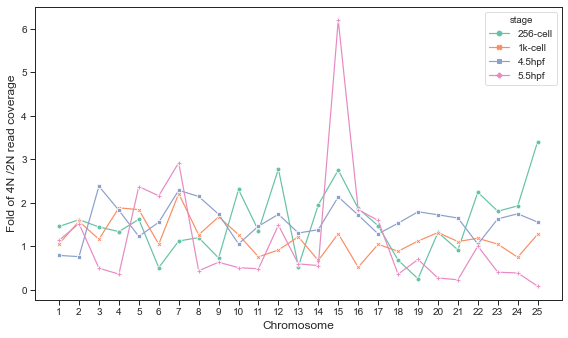

In [158]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, ax = plt.subplots(figsize = (6.4 * 1.25, 4.8), tight_layout = True)
    sns.lineplot(
        data = fold_cov_4Nvs2N_melt.sort_values(['stage_order', 'chr_order']),
        x = 'chr_order',
        y = 'value',
        hue = 'stage',
        style = 'stage',
        palette = 'Set2',
        ax = ax,
        markers=True, dashes=False,
        err_style="bars"
    )
    ax.set_xticks(range(1,26))
    ax.set_xlabel('Chromosome')
    ax.set_ylabel('Fold of 4N /2N read coverage')
    
    fig.savefig('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/figures/make1_line_fold_chrom_coverage_4Nvs2N.pdf', transparent = True)
    

# extract log

In [159]:
os.chdir('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/1_mapping')

In [164]:
import glob

jpgFilenamesList = glob.glob('*.log')
print(','.join(sorted(jpgFilenamesList)))

Mapping_Npm2a-1k-2N_20221209.log,Mapping_Npm2a-1k-2N_20221216.log,Mapping_Npm2a-1k-4N_20221209.log,Mapping_Npm2a-1k-4N_20221216.log,Mapping_Npm2a-256-2N_20221209.log,Mapping_Npm2a-256-2N_20221216.log,Mapping_Npm2a-256-4N_20221209.log,Mapping_Npm2a-256-4N_20221216.log,Mapping_Npm2a-4-5h-1-2N_20221216.log,Mapping_Npm2a-4-5h-1-4N_20221216.log,Mapping_Npm2a-4-5h-2-2N_20221216.log,Mapping_Npm2a-4-5h-2-4N_20221216.log,Mapping_Npm2a-4-5h-2N_20221209.log,Mapping_Npm2a-4-5h-4N_20221209.log,Mapping_Npm2a-5-5h-1-2N_20221209.log,Mapping_Npm2a-5-5h-1-4N_20221209.log,Mapping_Npm2a-5-5h-2-2N_20221209.log,Mapping_Npm2a-5-5h-2-4N_20221209.log,Mapping_YueLab_Input_embryonic_Brain_rep1.log,Mapping_YueLab_Input_embryonic_Brain_rep2.log,Mapping_YueLab_Input_embryonic_Trunk_rep1.log,Mapping_YueLab_Input_embryonic_Trunk_rep2.log


In [166]:
%%bash
/mnt/Storage/home/wangyiman/bin/utilities/extract_log.py -b Mapping_Npm2a-1k-2N_20221209.log,Mapping_Npm2a-1k-2N_20221216.log,Mapping_Npm2a-1k-4N_20221209.log,Mapping_Npm2a-1k-4N_20221216.log,Mapping_Npm2a-256-2N_20221209.log,Mapping_Npm2a-256-2N_20221216.log,Mapping_Npm2a-256-4N_20221209.log,Mapping_Npm2a-256-4N_20221216.log,Mapping_Npm2a-4-5h-1-2N_20221216.log,Mapping_Npm2a-4-5h-1-4N_20221216.log,Mapping_Npm2a-4-5h-2-2N_20221216.log,Mapping_Npm2a-4-5h-2-4N_20221216.log,Mapping_Npm2a-4-5h-2N_20221209.log,Mapping_Npm2a-4-5h-4N_20221209.log,Mapping_Npm2a-5-5h-1-2N_20221209.log,Mapping_Npm2a-5-5h-1-4N_20221209.log,Mapping_Npm2a-5-5h-2-2N_20221209.log,Mapping_Npm2a-5-5h-2-4N_20221209.log,Mapping_YueLab_Input_embryonic_Brain_rep1.log,Mapping_YueLab_Input_embryonic_Brain_rep2.log,Mapping_YueLab_Input_embryonic_Trunk_rep1.log,Mapping_YueLab_Input_embryonic_Trunk_rep2.log > Mapping_logs.tsv


#Wed 04 Jan 2023 19:38:58 WARNING log extractor : pid - 21771 :  set project info from input bowtie2, cause no info provided
#Wed 04 Jan 2023 19:38:58 INFO log extractor : pid - 21771 :  process over!


In [170]:
map_log = pd.read_csv('Mapping_logs.tsv', sep = "\t", )
map_log['Unique_mapping_ratio'] = map_log['bowtie2_uniq'] / map_log['bowtie2_total']
map_log['Sample'] = map_log['project'].str.split('Mapping_', expand= True)[1]
map_log

,project,bowtie2_total,bowtie2_uniq,bowtie2_multi,Unique_mapping_ratio,Sample
0,Mapping_Npm2a-1k-2N_20221209,22438731,10593603,3623615,0.472112,Npm2a-1k-2N_20221209
1,Mapping_Npm2a-1k-2N_20221216,33856423,19488395,4483499,0.575619,Npm2a-1k-2N_20221216
2,Mapping_Npm2a-1k-4N_20221209,18119602,9914003,3272831,0.547142,Npm2a-1k-4N_20221209
3,Mapping_Npm2a-1k-4N_20221216,35271654,19779822,6037529,0.560785,Npm2a-1k-4N_20221216
4,Mapping_Npm2a-256-2N_20221209,42639063,11400163,3496665,0.267364,Npm2a-256-2N_20221209
5,Mapping_Npm2a-256-2N_20221216,28365329,17152249,3310704,0.604691,Npm2a-256-2N_20221216
6,Mapping_Npm2a-256-4N_20221209,36284769,11138030,4026602,0.306962,Npm2a-256-4N_20221209
7,Mapping_Npm2a-256-4N_20221216,25506709,15067741,4818679,0.590736,Npm2a-256-4N_20221216
8,Mapping_Npm2a-4-5h-1-2N_20221216,35923958,21669087,4317643,0.603193,Npm2a-4-5h-1-2N_20221216
9,Mapping_Npm2a-4-5h-1-4N_20221216,36615126,19408158,6097112,0.530058,Npm2a-4-5h-1-4N_20221216
